## Face Detection-Viola Jones Algorithm

It Consits of four methods:
    Haar Features
    Integral Images
    Adaboost
    Cascade Classfier 

In [4]:
import cv2
import os
cascPathface = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"

faceCascade = cv2.CascadeClassifier(cascPathface)

video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,43), 2)
        faceROI = frame[y:y+h,x:x+w]
        
        # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

In [10]:
# Importing OpenCV package
import cv2

# Reading the image
img = cv2.imread('Images/BN-RC822_BYUH_GR_20161207114508.jpg')

# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'Haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
	cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('Detected faces', img)

cv2.imwrite('facedetection.jpeg',img)

cv2.waitKey(0)


-1

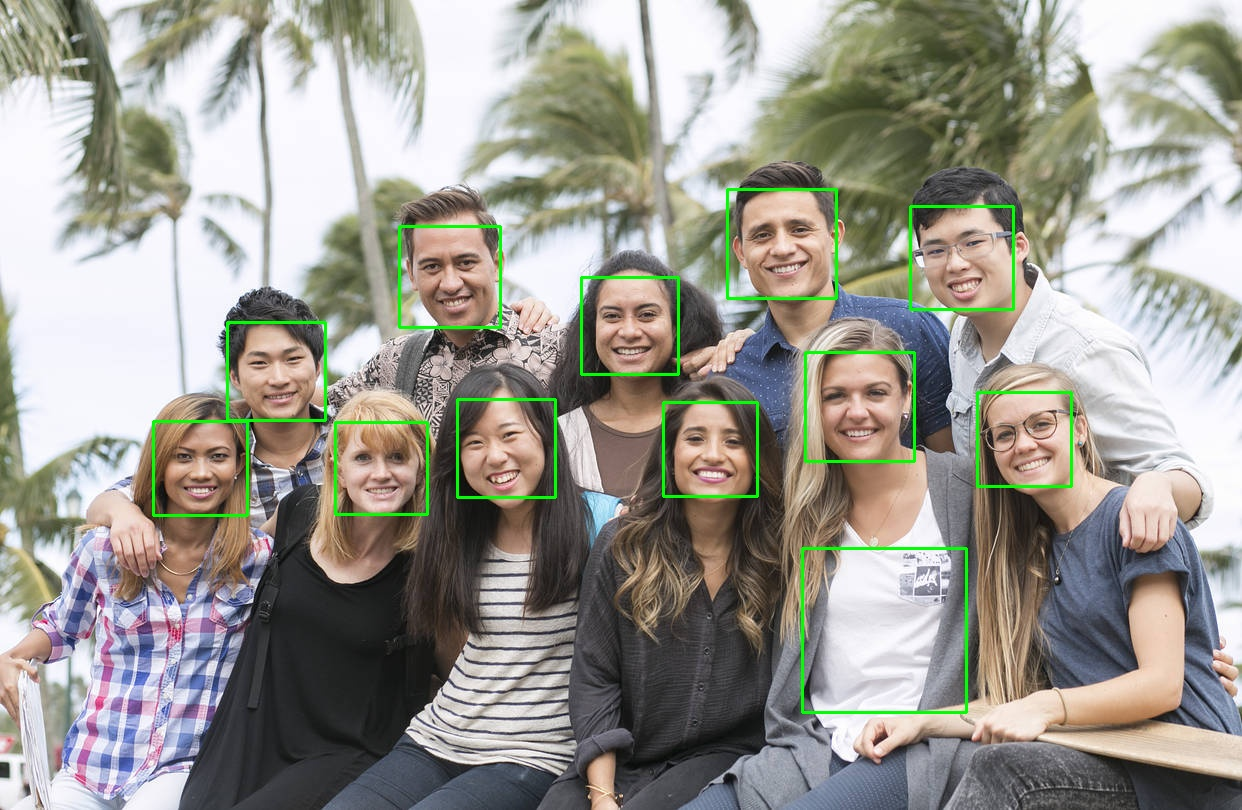

In [5]:
import cv2
import os
cascPathface = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
cascPatheyes = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_eye_tree_eyeglasses.xml"

faceCascade = cv2.CascadeClassifier(cascPathface)
eyeCascade = cv2.CascadeClassifier(cascPatheyes)

video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,43), 2)
        faceROI = frame[y:y+h,x:x+w]
        eyes = eyeCascade.detectMultiScale(faceROI)
        for (x2, y2, w2, h2) in eyes:
            eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            radius = int(round((w2 + h2) * 0.25))
            frame = cv2.circle(frame, eye_center, radius, (0, 0, 255), 2)

        # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()